In [1]:
import sklearn
import numpy as np
!pip install shap
import shap
import time

X,y = shap.datasets.boston()

shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 30.6 MB/s eta 0:00:00


Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [2]:
def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X) - y)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

In [3]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(8,8,8), random_state=0)
nn.fit(X,y)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


MLPRegressor(hidden_layer_sizes=(8, 8, 8), random_state=0, solver='lbfgs')

In [4]:
print_accuracy(nn.predict)

Root mean squared test error = 4.8919544581594545


In [5]:
explainer = shap.KernelExplainer(nn.predict, data = shap.kmeans(X,10))
shap_values = explainer.shap_values(X)

X does not have valid feature names, but MLPRegressor was fitted with feature names


  0%|          | 0/506 [00:00<?, ?it/s]

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with featur

In [7]:
shap.initjs()

shap.force_plot(explainer.expected_value,shap_values[0])

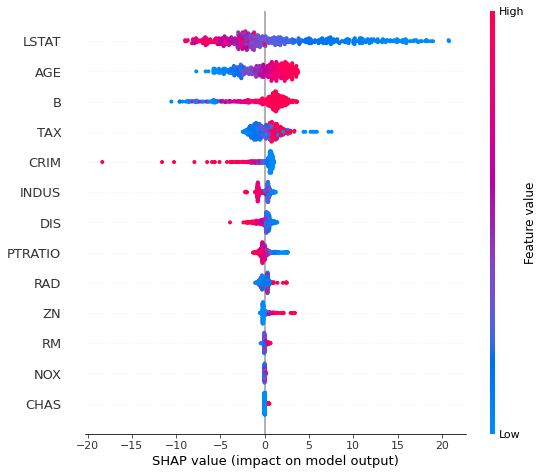

In [8]:

shap.summary_plot(shap_values, X)

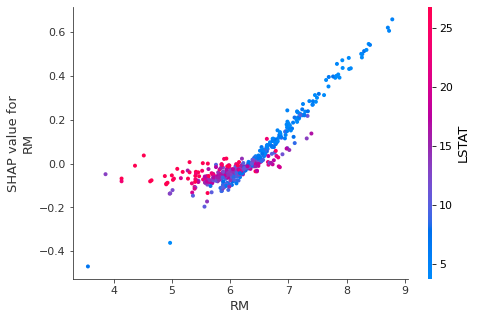

In [9]:
shap.dependence_plot("RM", shap_values, X)

In [10]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)